# Sentiment Analysis on IMDB Movie Reviews

This project aims to perform sentiment analysis on the IMDB movie reviews dataset. We will predict whether a review is positive or negative based on its content.


In [10]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import re


## Load and Explore the Dataset

First, we will load the dataset and perform a preliminary exploration to understand its structure and content.


In [11]:
# Load the dataset
data = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')

# Display the first few rows of the dataset
data.head()

# Display basic information about the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


## Data Visualization

Next, let's visualize the data to better understand the distribution of positive and negative reviews.


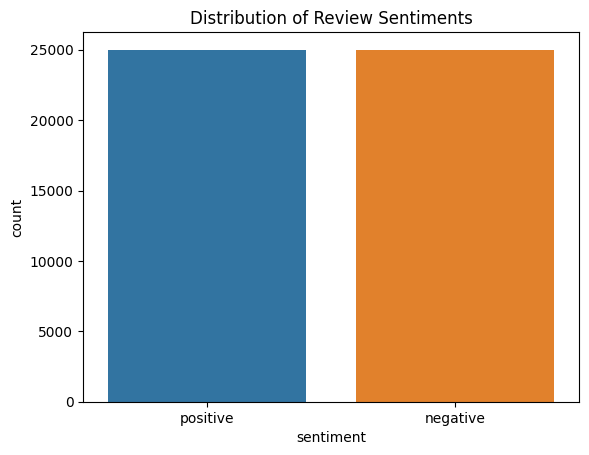

In [12]:
# Visualize the distribution of sentiments
sns.countplot(x='sentiment', data=data)
plt.title('Distribution of Review Sentiments')
plt.show()


## Data Preprocessing

Data preprocessing is a critical step in any machine learning project. We will clean the text data by removing unnecessary characters and HTML tags.


In [13]:
# Function to clean text data
def clean_text(text):
    text = re.sub('<[^>]*>', '', text)
    text = re.sub('[\W]+', ' ', text.lower())
    return text

# Apply the cleaning function to the review column
data['review'] = data['review'].apply(clean_text)


## Feature Engineering

To convert the text data into a format that can be understood by our machine learning model, we will use the TF-IDF method for feature extraction.


In [14]:
# Extract features using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(data['review']).toarray()
y = data['sentiment'].map({'positive': 1, 'negative': 0}).values


## Splitting the Dataset

We will split the dataset into a training set and a test set to train our model and evaluate its performance.


In [15]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Model Training and Evaluation

Now, we will train a logistic regression model for sentiment analysis and evaluate its performance on the test set.


In [16]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
predictions = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))


Accuracy: 0.8953
Confusion Matrix:
 [[4375  586]
 [ 461 4578]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      4961
           1       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



## Conclusion

Our logistic regression model performed well on the IMDB movie review dataset, achieving an accuracy of approximately 89.53%. Further steps might include experimenting with different models, such as deep learning approaches, or further refining feature engineering and model parameters.
